## Calibration Simulation

This notebooks views results of fits to purely simulated data. It is mostly just to test that the likelihoods are correct etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from edges_cal import modelling as mdl
from pathlib import Path

import mcmc_utils as mutl
from edges_estimate.eor_models import AbsorptionProfile
from edges_estimate.fitting import SemiLinearFit
from getdist import plots

import alan_data_utils as utils
import alan_data as adata
import glob
import run_alan_cal_simulation_mcmc as mcmc
from scipy import optimize
import notebook_utils as nutl
import pickle
from multiprocessing import Pool

plt.ion()

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
nutl.setup_mpl()

In [3]:
calobs32 = utils.get_calobs(smooth=32)

In [5]:
names = sorted(Path('outputs/alan_cal_simulation/').glob("*"))

lks = {}
for name in names:
    print(name.name)
    lks[name.name] = mcmc.precal.get_likelihood_from_label(name.name)

c6_w5_cf6_wf5_smooth32_tns500_var-data_s11()_nscale01_ndelay01
6 6 6
('hot_load', 'ambient', 'short', 'open') True
c6_w5_cf6_wf5_smooth32_tns500_var-data_s11()_nscale01_ndelay01_noiseFalse
6 6 6
('hot_load', 'ambient', 'short', 'open') False
c6_w5_cf6_wf5_smooth32_tns500_var-data_s11()_nscale01_ndelay01_noiseTrue
6 6 6
('hot_load', 'ambient', 'short', 'open') True
c6_w5_cf6_wf6_smooth32_tns500_var-data_s11()_nscale01_ndelay01_noiseTrue
6 6 6
('hot_load', 'ambient', 'short', 'open') True
c6_w5_cf7_wf5_smooth32_tns500_var-data_s11()_nscale01_ndelay01_noiseTrue
7 7 7
('hot_load', 'ambient', 'short', 'open') True


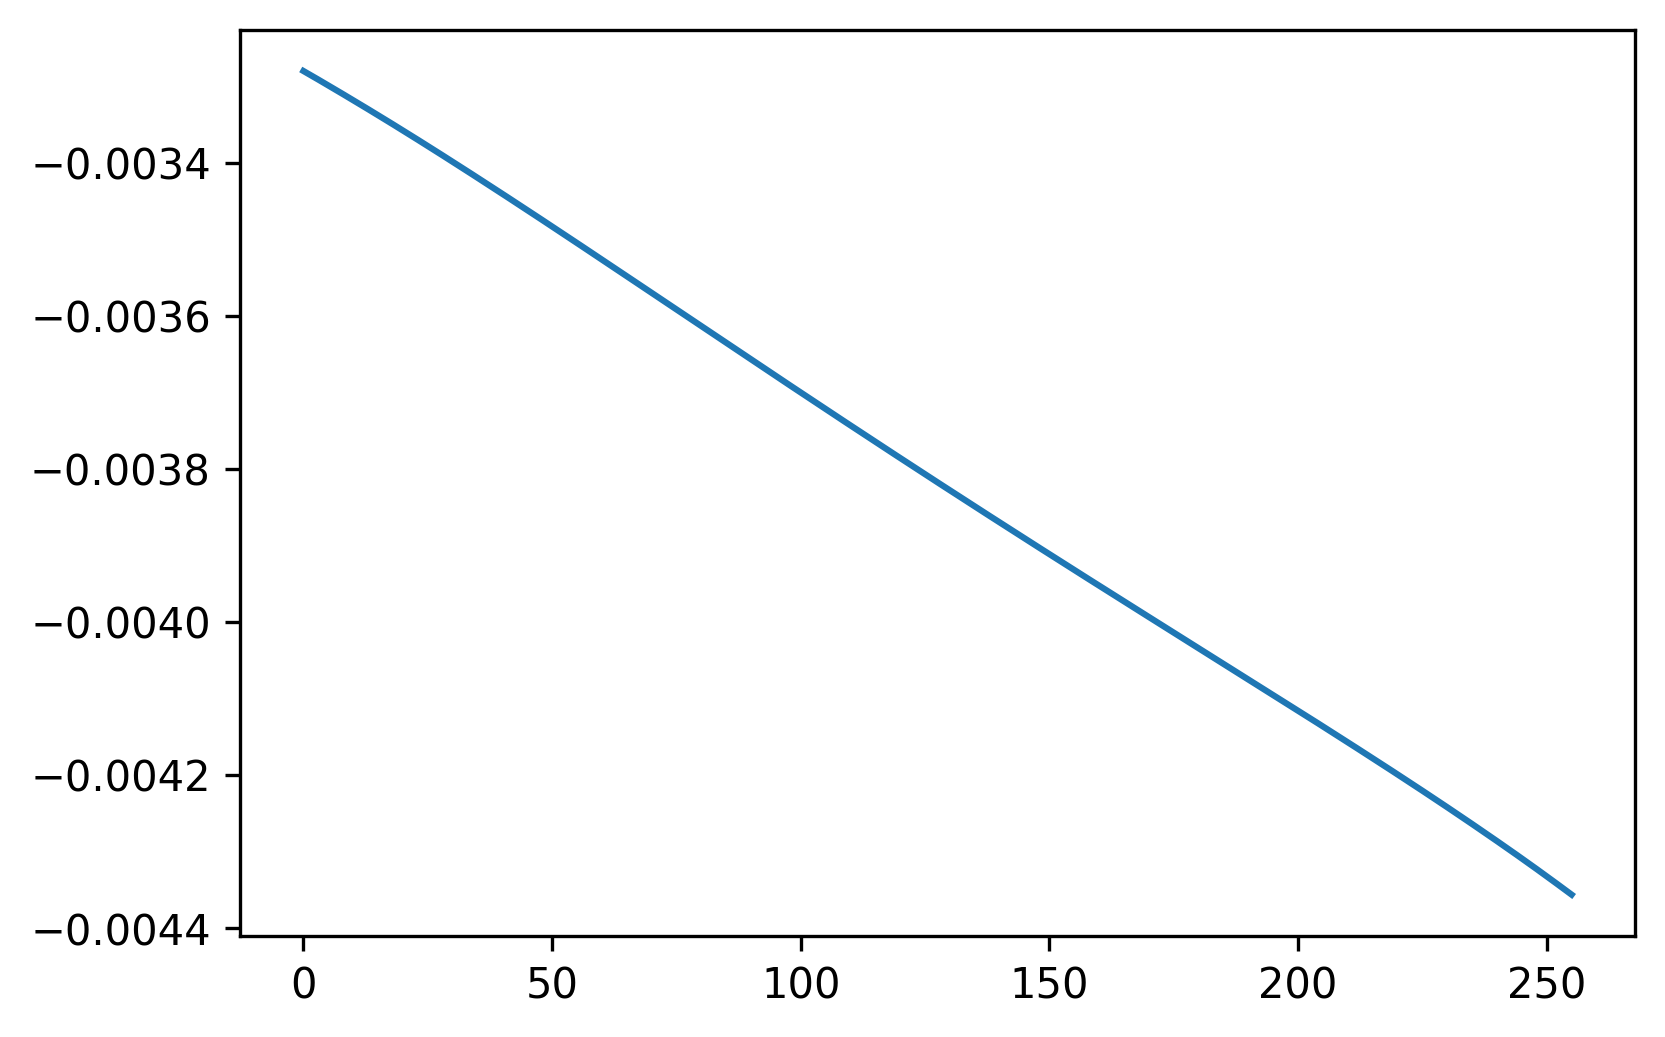

In [6]:
plt.plot(lks['c6_w5_cf6_wf5_smooth32_tns500_var-data_s11()_nscale01_ndelay01_noiseFalse'].data['q'][:256])

In [14]:
lk = mcmc.precal.get_likelihood(smooth=32, tns_width=5, add_noise=False, s11_sys=('short', 'open'))

6 6 6
('hot_load', 'ambient', 'short', 'open') False


In [15]:
ctx = lk.partial_linear_model.get_ctx()

In [18]:
model = lk.partial_linear_model.reduce_model(ctx)

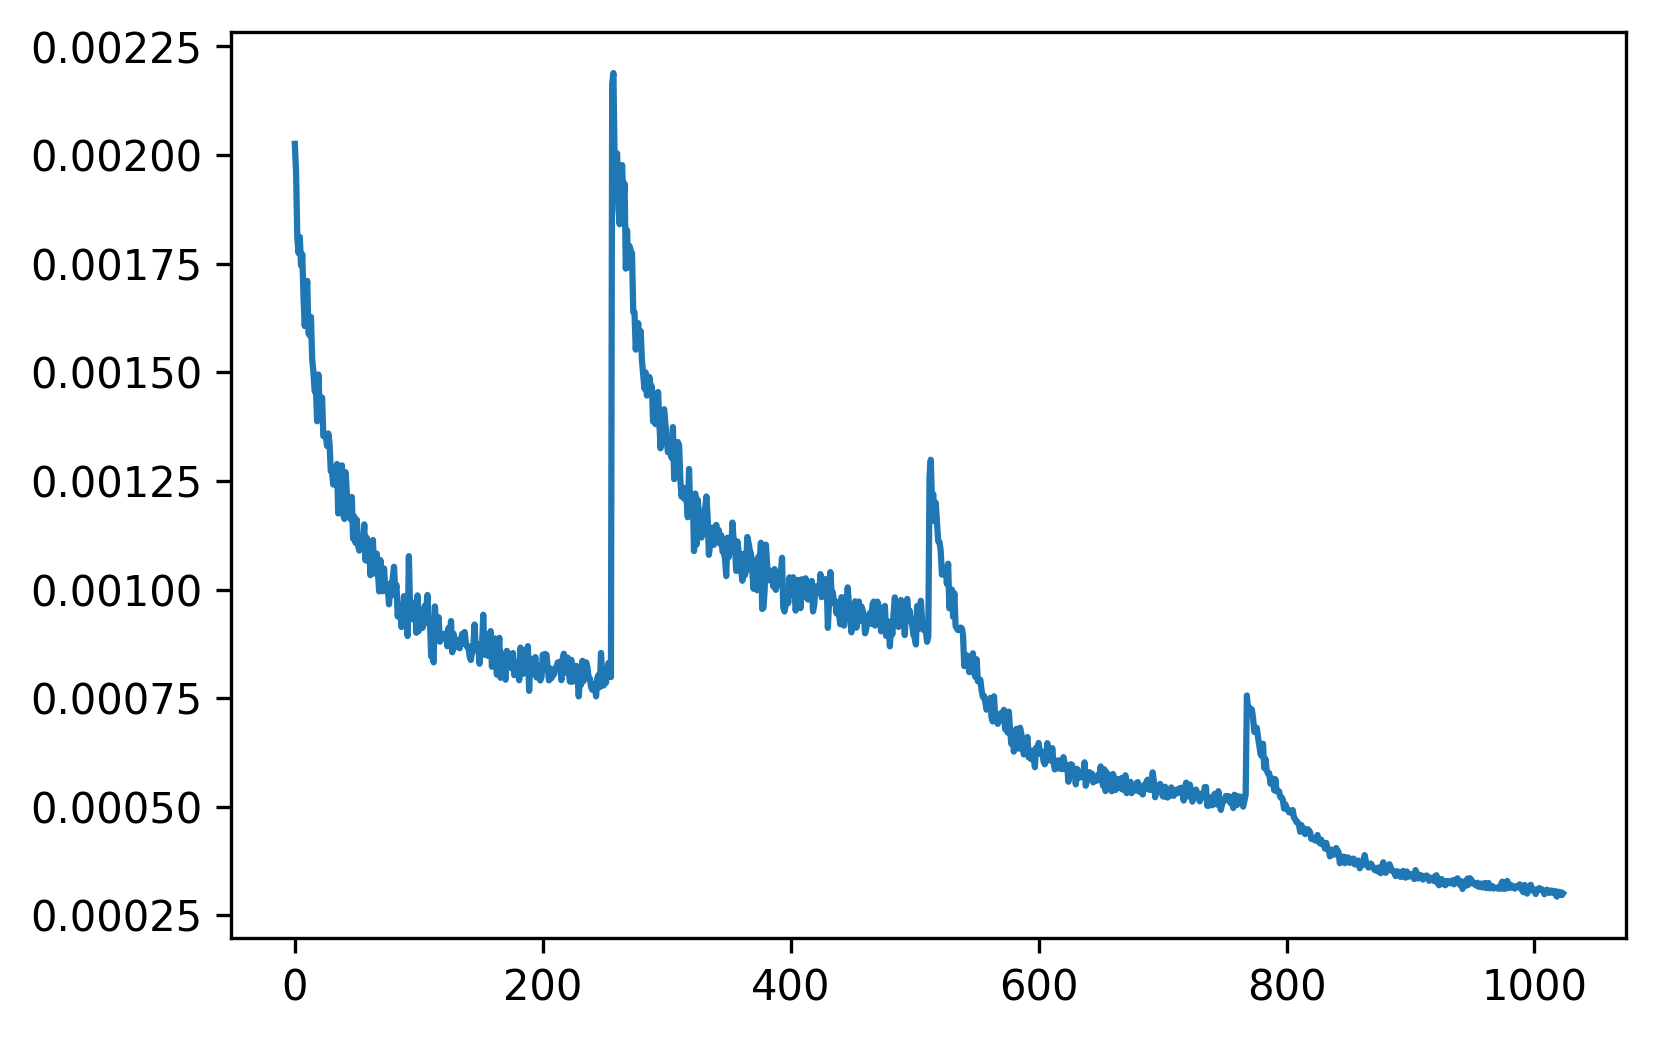

In [21]:
plt.plot(model[2])

In [23]:
lk.partial_linear_model.data_func

<bound method NoiseWaveLikelihood.transform_data of <class 'edges_estimate.likelihoods.NoiseWaveLikelihood'>>

In [22]:
model[0].residual

array([ 1.19371180e-12,  9.66338121e-13,  1.02318154e-12, ...,
       -3.69482223e-13, -5.11590770e-13, -5.54223334e-13])

In [24]:
from yabf import run_map

In [25]:
res = run_map(lk.partial_linear_model)

In [26]:
res.x

array([ 1.48567817e+03, -1.94835467e+02,  6.28489689e+01, -1.86395779e+01,
        6.60235276e+00, -3.45500692e+00, -6.87648090e-06, -4.36719554e-06,
       -6.88045145e-06, -2.36264005e-06])

In [27]:
lk.partial_linear_model.logp(params=res.x)

3592.424514349724

In [28]:
lk.partial_linear_model.logp()

3592.4238464627692

In [39]:
res2 = run_map(lk.partial_linear_model, basinhopping_kw={'niter': 20})

In [40]:
res2

                        fun: -3592.424514349724
 lowest_optimization_result:       fun: -3592.424514349724
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.06684857e-02, -1.29330044e-01, -4.77939426e-02, -8.45375255e-02,
       -3.61069399e-02, -6.45741242e-02,  3.91427466e+02, -3.05180947e-01,
        8.51374807e+01,  3.15549187e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 77
      nit: 2
     njev: 7
   status: 0
  success: True
        x: array([ 1.48567817e+03, -1.94835467e+02,  6.28489689e+01, -1.86395779e+01,
        6.60235276e+00, -3.45500692e+00, -6.87648090e-06, -4.36719554e-06,
       -6.88045145e-06, -2.36264005e-06])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 7623
                        nit: 20
                       njev: 693
                    success: True
                          x: array(

In [41]:
[p.fiducial for p in lk.partial_linear_model.child_active_params]

[1485.6792190553897,
 -194.8354195885617,
 62.84931729236473,
 -18.63954952360565,
 6.602561532221233,
 -3.4549865882564075,
 0.0,
 0.0,
 0.0,
 0.0]

In [36]:
lk.partial_linear_model.logp(params=res2.x)

3588.1810631742223

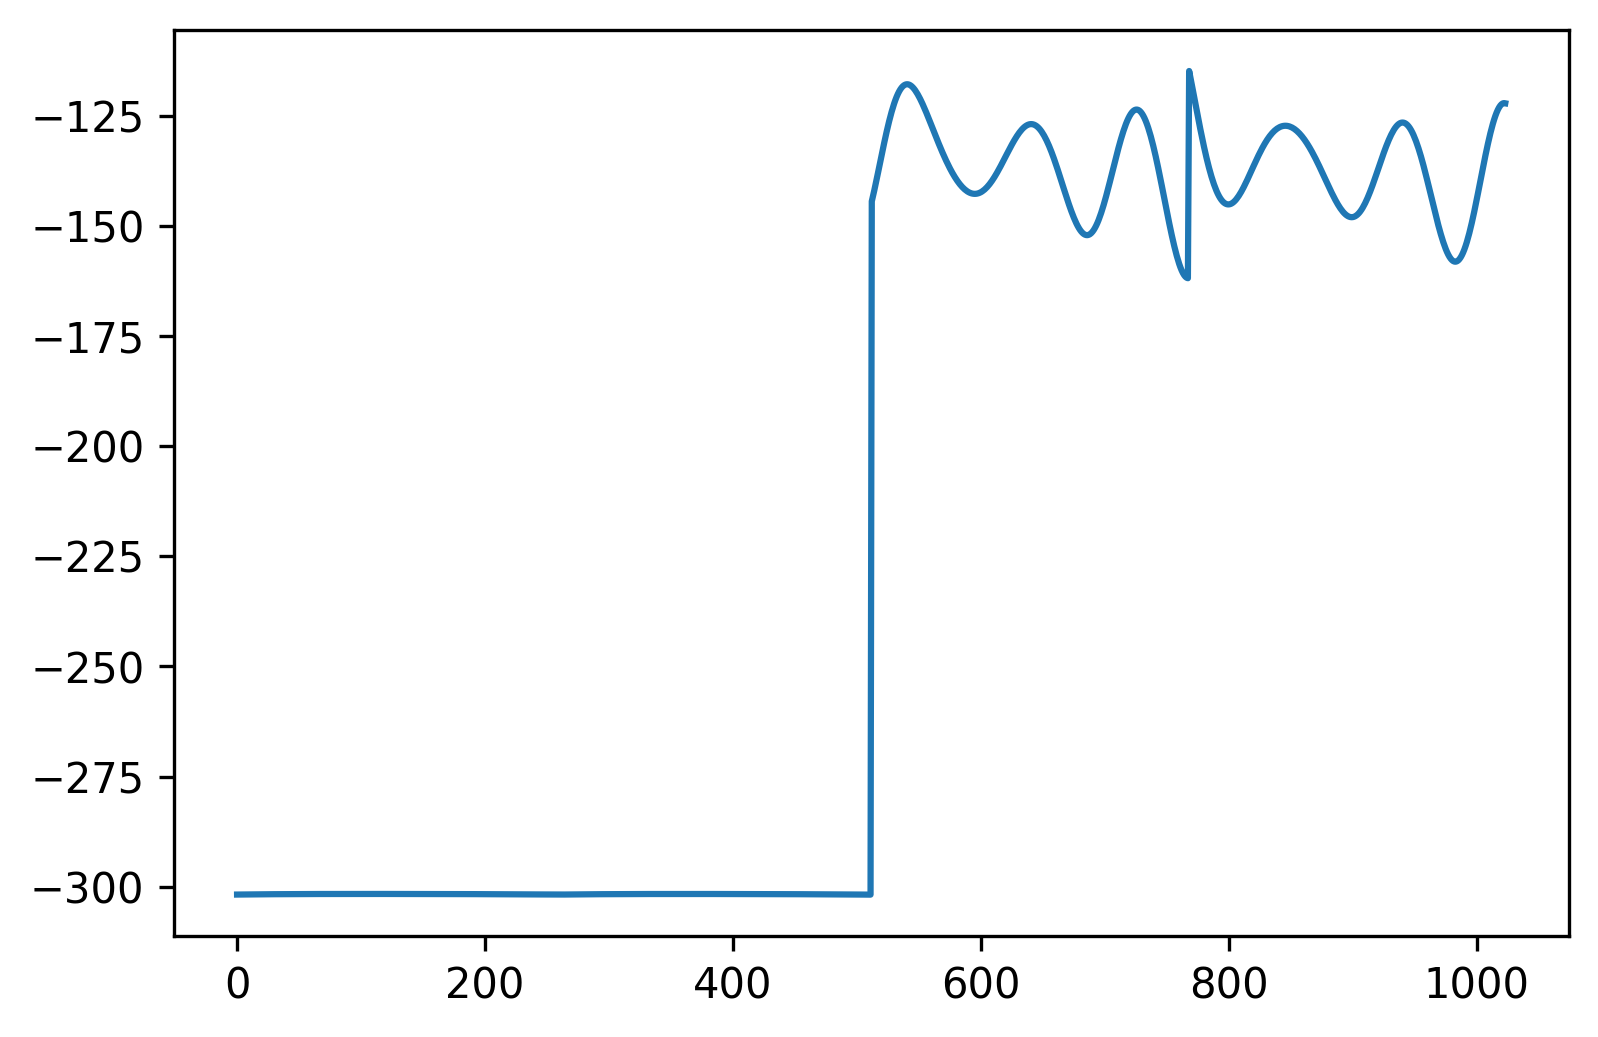

In [20]:
plt.plot(model[1])

In [ ]:
lk = mcmc.precal.get_likelihood()

In [ ]:
lk = mcmc.get_likelihood